<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_488_triangle_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

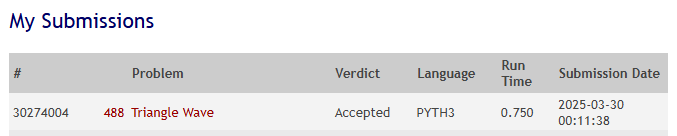

**@PDF: [UVA 488 Triangle Wave](https://onlinejudge.org/external/4/488.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

# UVA 488 Triangle Wave

In this problem you are to generate a triangular wave form according to a specified pair of Amplitude and Frequency.

## Input

The input begins with a single positive integer on a line by itself indicating the number of the cases following, each of them as described below. This line is followed by a blank line, and there is also a blank line between two consecutive inputs.

Each input set will contain two positive integers, each on a separate line. The first integer is the Amplitude; the second integer is the Frequency.

## Output

For each test case, the output must follow the description below. The outputs of two consecutive cases will be separated by a blank line.

For the output of your program, you will be printing wave forms each separated by a blank line. The total number of wave forms equals the Frequency, and the horizontal "height" of each wave equals the Amplitude. The Amplitude will never be greater than nine.

The waveform itself should be filled with integers on each line which indicate the "height" of that line.

NOTE: There is a blank line after each separate waveform, excluding the last one.

## Sample Input

1\
\
3\
2


## Sample Output

1\
22\
333\
22\
1\
\
1\
22\
333\
22\
1

In [ ]:
import sys

# --- Problem Description ---
# Problem: UVA 488 - Triangle Wave
# Input: Amplitude (A <= 9) and Frequency (F). [cite: 4, 5, 9]
# Output: Print F triangle waveforms. Each waveform consists of lines
#         with digits 'h' repeated 'h' times, going from h=1 up to A,
#         and then back down to h=1. [cite: 1, 8, 9]
# Formatting: Specific blank line rules apply between waveforms and
#             between test cases. [cite: 3, 6, 7, 10]

# --- Data Structures and Algorithms (DSA) Comments ---
#
# Data Structures Used:
#   - Integers: To store Amplitude (A), Frequency (F), and loop counters (h, f, i).
#               Given A <= 9, standard integers are sufficient. [cite: 9]
#   - Strings: To construct each output line (e.g., '333'). Python's built-in
#              string multiplication (`str(h) * h`) is used for efficient repetition.
#
# Algorithm Employed:
#   - Nested Loops: The core logic uses nested loops for control flow and pattern generation.
#       1. Outermost Loop: Iterates through the number of test cases provided in the input.
#       2. Frequency Loop: For each test case, iterates F times to generate F waveforms. [cite: 8]
#       3. Waveform Generation Loops (within `print_single_waveform`):
#          - Ascending Loop: Iterates height `h` from 1 up to Amplitude `A`.
#          - Descending Loop: Iterates height `h` from `A-1` down to 1.
#   - Output Formatting: Logic is carefully implemented to handle blank lines precisely:
#       - A blank line is read after the initial count of test cases. [cite: 3]
#       - A blank line is printed between consecutive waveforms within the same test case,
#         *except* after the last waveform of that test case. [cite: 10]
#       - A blank line is printed between the entire outputs of consecutive test cases. [cite: 6]
#       - A blank line is read between the inputs of consecutive test cases. [cite: 3]
#
# Time Complexity:
#   - Printing one waveform takes O(A) lines and involves printing roughly
#     Sum(h from 1 to A) + Sum(h from 1 to A-1) characters, which is O(A^2).
#   - Each test case prints F waveforms, so O(F * A^2) characters per test case.
#   - Total time is O(NumTestCases * Frequency * Amplitude^2) in terms of characters printed.
#   - Since Amplitude (A) is small (<= 9), A^2 is at most 81, making the algorithm very efficient.
#
# Space Complexity:
#   - O(A) auxiliary space: Primarily to store the longest string line (e.g., '999999999')
#     temporarily before printing. The overall memory usage is minimal.

def print_single_waveform(amplitude):
    """
    Prints one complete triangle wave pattern for the given amplitude.
    Uses two loops: one ascending (1 to A), one descending (A-1 to 1).
    """
    # Ascending part: Loop h from 1 to A (inclusive)
    # For each h, print the digit h repeated h times.
    for h in range(1, amplitude + 1):
        # Efficient string repetition using multiplication.
        print(str(h) * h)

    # Descending part: Loop h from A-1 down to 1 (inclusive)
    # For each h, print the digit h repeated h times.
    for h in range(amplitude - 1, 0, -1):
        print(str(h) * h)

# --- Main Execution Logic ---

# Read the total number of test cases.
num_test_cases = int(sys.stdin.readline().strip())

# Consume the blank line immediately following the number of test cases. [cite: 3]
# Check if num_test_cases > 0 to prevent reading beyond input if N=0.
if num_test_cases > 0:
    try:
        sys.stdin.readline()
    except EOFError:
        # Handle cases where input might end unexpectedly after N
        num_test_cases = 0 # Ensure loop doesn't run

# Loop through each test case (indexed from 0 to num_test_cases - 1).
for i in range(num_test_cases):
    # Read Amplitude and Frequency for the current test case.
    # Added error handling for potentially incomplete/malformed input.
    try:
        amplitude_str = sys.stdin.readline()
        if not amplitude_str: break # EOF reached prematurely
        amplitude = int(amplitude_str.strip())

        frequency_str = sys.stdin.readline()
        if not frequency_str: break # EOF reached prematurely
        frequency = int(frequency_str.strip())
    except (EOFError, ValueError):
        # If input is not as expected (e.g., non-integer, missing lines)
        break # Stop processing further test cases

    # Generate and print the required number of waveforms (Frequency times).
    for f in range(frequency):
        # Call the function to print one waveform.
        print_single_waveform(amplitude)

        # Add a blank line *between* waveforms of the *same* test case,
        # as per rule[cite: 10], *unless* it's the last waveform for this frequency.
        is_last_waveform_in_frequency = (f == frequency - 1)
        if not is_last_waveform_in_frequency:
            print() # Print separator blank line

    # Add a blank line *between* the outputs of *consecutive* test cases,
    # as per rule[cite: 6], *unless* it's the very last test case overall.
    is_last_test_case_overall = (i == num_test_cases - 1)
    if not is_last_test_case_overall:
        print() # Print separator blank line

        # Consume the blank line that separates the *input* sets of consecutive test cases,
        # as per rule[cite: 3]. This read prepares for the next test case's input.
        try:
            sys.stdin.readline()
        except EOFError:
            # Handle if input ends unexpectedly after the last frequency output
            break